<a href="https://colab.research.google.com/github/Renator12/DATA-SCIENCE-PROJECTS-TMU/blob/main/SVM_for_pulsarstar_classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/alexandrehsd/Predicting-Pulsar-Stars/master/pulsar_stars.csv

--2024-03-26 21:04:00--  https://raw.githubusercontent.com/alexandrehsd/Predicting-Pulsar-Stars/master/pulsar_stars.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1748317 (1.7M) [text/plain]
Saving to: ‘pulsar_stars.csv’

pulsar_stars.csv    100%[===================>]   1.67M  --.-KB/s    in 0.03s   

2024-03-26 21:04:00 (61.5 MB/s) - ‘pulsar_stars.csv’ saved [1748317/1748317]



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
df=pd.read_csv('pulsar_stars.csv') #read in dataframe
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
#change name to match convention for columns
dictname={df.columns[0]:'mean_integerated_profile',df.columns[1]:'std_integrated_profile',df.columns[2]:'excess_kurtosis_integrated_profile',df.columns[3]:'skewness_integrated_profile',df.columns[4]:'mean_dm_SNR_curve',df.columns[5]:'std_dm_snr_curve',df.columns[6]:'excess_kurtosis_dm_snr_curve',df.columns[7]:'skew_dm_snr_curve'}

In [ ]:
df.rename(columns=dictname,inplace=True)

In [ ]:
df.head()#checking dataframe structure and top rows

,mean_integerated_profile,std_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dm_SNR_curve,std_dm_snr_curve,excess_kurtosis_dm_snr_curve,skew_dm_snr_curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   mean_integerated_profile            17898 non-null  float64
 1   std_integrated_profile              17898 non-null  float64
 2   excess_kurtosis_integrated_profile  17898 non-null  float64
 3   skewness_integrated_profile         17898 non-null  float64
 4   mean_dm_SNR_curve                   17898 non-null  float64
 5   std_dm_snr_curve                    17898 non-null  float64
 6   excess_kurtosis_dm_snr_curve        17898 non-null  float64
 7   skew_dm_snr_curve                   17898 non-null  float64
 8   target_class                        17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [ ]:
df.dropna(inplace=True)#dropping empty vals

In [ ]:
df['target_class'].value_counts() #target class distribution! heavily distributed towards 0

0    16259
1     1639
Name: target_class, dtype: int64

In [ ]:
#plotting 3 plots per line for the numeric columns
numeric_columns = df.select_dtypes(include='number').columns
dfnumeric=df.drop(['target_class'],axis=1)
dfnumeric.head()

,mean_integerated_profile,std_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dm_SNR_curve,std_dm_snr_curve,excess_kurtosis_dm_snr_curve,skew_dm_snr_curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [ ]:


def plot_numeric_columns(df, plot_type='hist'):
    column_names = df.columns
    num_columns = len(column_names)

    # Calculate the number of rows and columns for subplots
    num_rows = (num_columns + 2) // 3  # Ensure at least 3 columns per row
    num_cols = min(num_columns, 3)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    axes = axes.flatten()  # Flatten the 2D array

    for i, column_name in enumerate(column_names):#iterate over column names and check if plot type is hist or boxplot
        if plot_type == 'hist':
            axes[i].hist(df[column_name])
            axes[i].set_title(column_name + ' Histogram')
        else:
            axes[i].boxplot(df[column_name])
            axes[i].set_title(column_name + ' Box Plot')

    # Hide empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


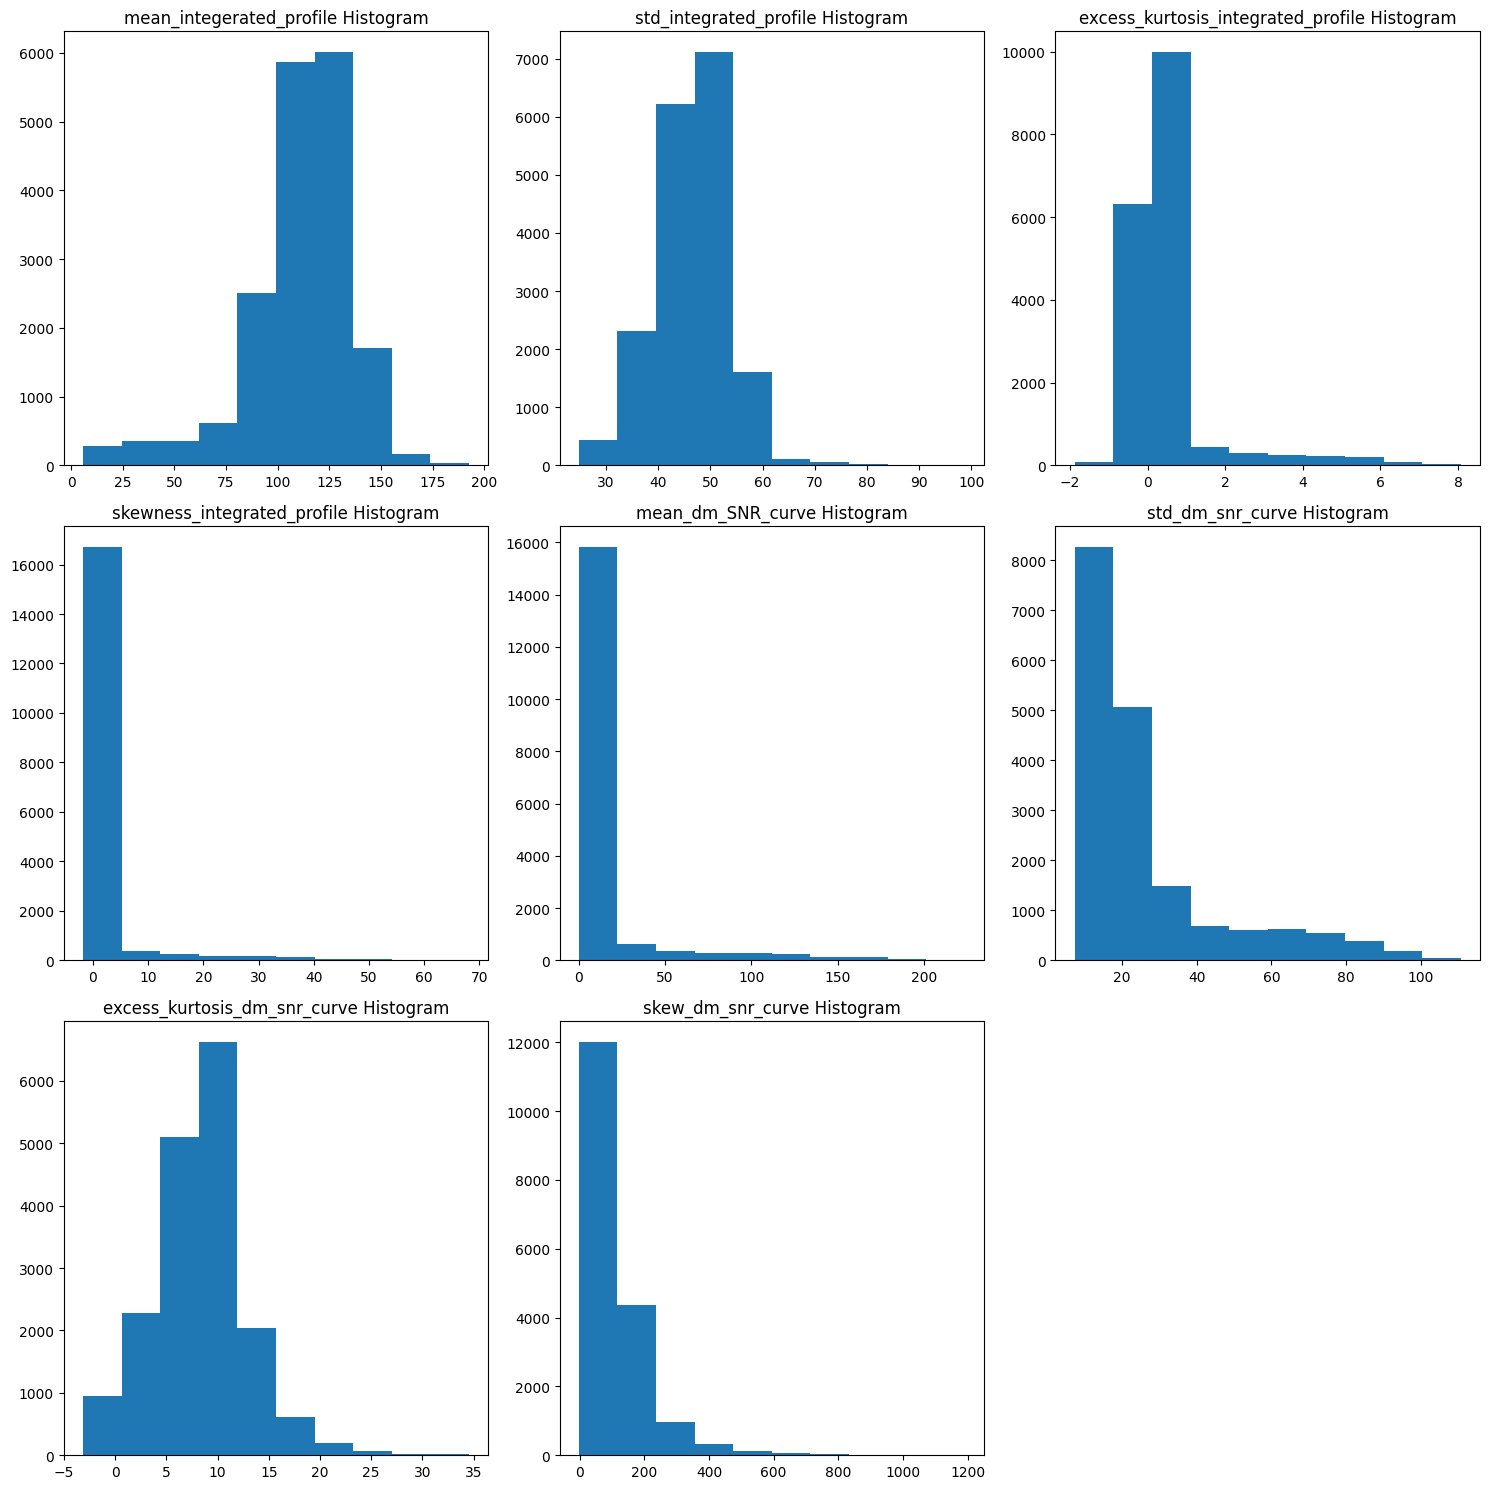

In [ ]:
plot_numeric_columns(dfnumeric,'hist') #histograms.Can clearly see that there are some outliers edging in the outskirts of the graphs

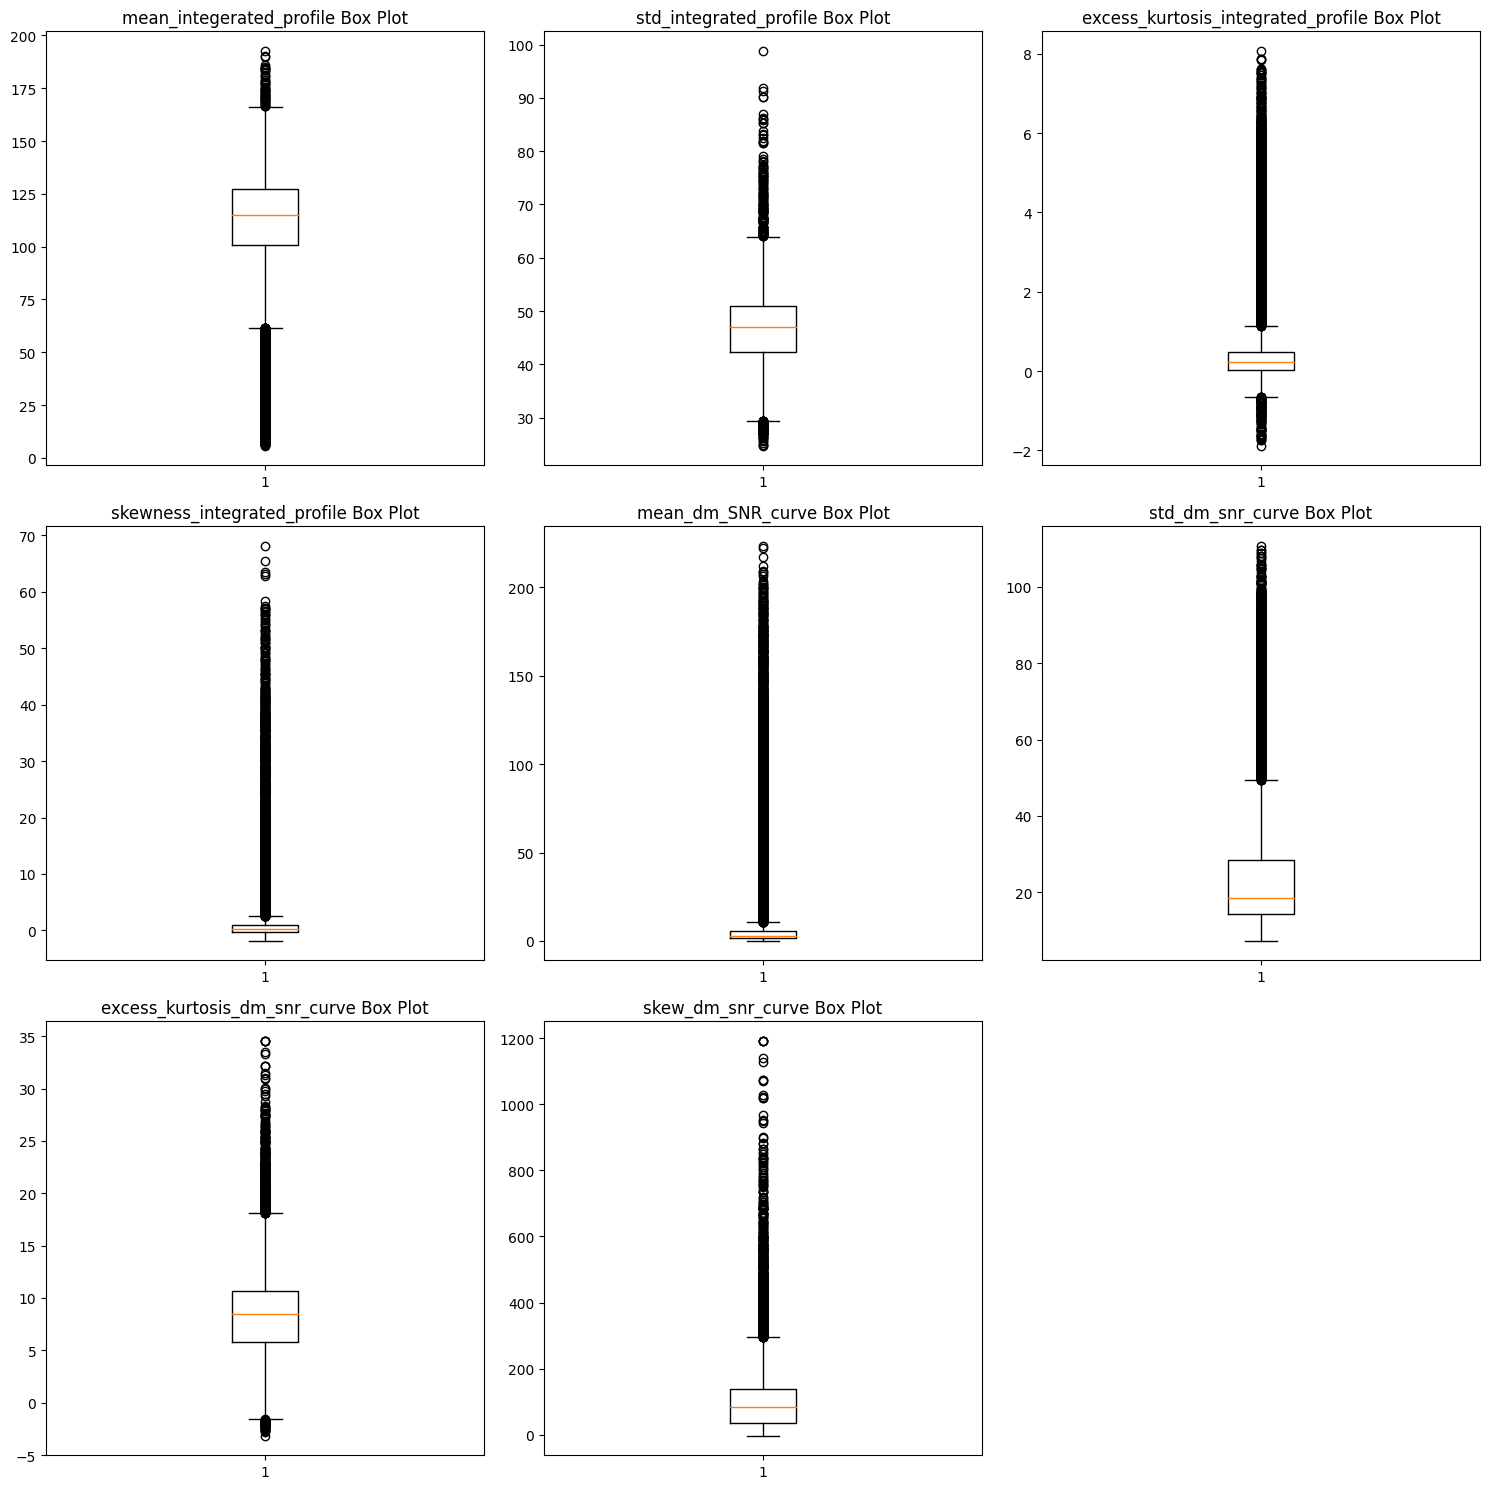

In [ ]:
plot_numeric_columns(dfnumeric,'')# boxplots

In [ ]:
#standardize dataframe function.Standardizing features is essential for SVMs to ensure that all features contribute equally to the decision boundary. By scaling features to a similar range, the optimization algorithm can converge more efficiently, leading to faster and more stable training
def standardize_column(column):
    mean = column.mean()
    std = column.std()
    standardized_column = (column - mean) / std
    return standardized_column


In [ ]:
def standardize_dataframe(df): #apply it
    standardized_df = df.copy()
    for column in df.columns:
        standardized_df[column] = standardize_column(df[column])
    return standardized_df

In [ ]:
df_standardized=standardize_dataframe(dfnumeric)#new dataframe which is standardizes

In [ ]:
df_standardized['target_class']=df['target_class'] #adding in target class

In [ ]:
df_standardized.head()

,mean_integerated_profile,std_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dm_SNR_curve,std_dm_snr_curve,excess_kurtosis_dm_snr_curve,skew_dm_snr_curve,target_class
0,1.149285,1.334794,-0.669551,-0.400448,-0.319431,-0.370615,-0.072796,-0.287430,0
1,-0.334159,1.802215,-0.011784,-0.370525,-0.371092,-0.588908,0.504413,0.211576,0
2,-0.314363,-1.053293,-0.145229,-0.116590,-0.322098,-0.235322,-0.125993,-0.391363,0
3,1.000666,1.553211,-0.513394,-0.390167,-0.304396,-0.275659,-0.312257,-0.481287,0
4,-0.871378,-0.858855,0.115605,-0.104863,-0.388000,-0.763090,1.323989,1.386755,0


In [ ]:
X=df_standardized.drop(['target_class'],axis=1) #train ,test splitting x and y
y=df_standardized['target_class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#train test split .test_size =0.2 ,train =0.8

In [ ]:
#Support Vector Machines (SVMs) utilize kernels like linear, polynomial, Radial Basis Function (RBF), and sigmoid to map data into higher-dimensional spaces for classification and regression. The RBF kernel is the default choice due to its versatility and effectiveness in handling non-linear data.

In [ ]:
clf = svm.SVC() #default svm

In [ ]:
clf.fit(X_train, y_train)

SVC()

In [ ]:
predictions=clf.predict(X_test)#predictions for default classifer

In [ ]:
accuracy_score(y_test, predictions) #97% accuracy with SVM default. the default kernel used for the Support Vector Classifier (SVC) is the Radial Basis Function (RBF) kernel

0.978838665989504

In [ ]:
def generate_classification_report(y_pred,y_real): #generates a confusion matrix and f2 score alongside accuracy(helper function) to 4 decimal places
  print('Confusion matrix is ',(confusion_matrix(y_real,y_pred)))
  print('F1 SCORE IS',round(f1_score(y_real,y_pred),4))
  print('Accuracy is ',round(accuracy_score(y_real,y_pred),4))

In [ ]:
generate_classification_report(predictions,y_test)

Confusion matrix is  [[5354   27]
 [  98  428]]
F1 SCORE IS 0.872579001019368
Accuracy is  0.978838665989504


In [ ]:
#trying out svm classifier with different regularization parameters.Not a massive change in accuracy between the params
regularization_params = [1.0, 100.0, 1000.0]

for C in regularization_params:
    svm_model = svm.SVC(C=C)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    print('REGULARIZATION PARAMETER IS ',C)
    print('---------------------------')
    generate_classification_report(y_pred,y_test)
    print('----------------------------')

REGULARIZATION PARAMETER IS  1.0
---------------------------
Confusion matrix is  [[5354   27]
 [  98  428]]
F1 SCORE IS 0.872579001019368
Accuracy is  0.978838665989504
----------------------------
REGULARIZATION PARAMETER IS  100.0
---------------------------
Confusion matrix is  [[5347   34]
 [  86  440]]
F1 SCORE IS 0.88
Accuracy is  0.9796851193499239
----------------------------
REGULARIZATION PARAMETER IS  1000.0
---------------------------
Confusion matrix is  [[5343   38]
 [  84  442]]
F1 SCORE IS 0.878727634194831
Accuracy is  0.9793465380057559
----------------------------


In [ ]:
#linear kernel gives us an accuracy of 97.8%
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print('REGULARIZATION PARAMETER IS ',C)
print('---------------------------')
generate_classification_report(y_pred,y_test)
print('----------------------------')

REGULARIZATION PARAMETER IS  1000.0
---------------------------
Confusion matrix is  [[5355   26]
 [ 100  426]]
F1 SCORE IS 0.8711656441717791
Accuracy is  0.97866937531742
----------------------------


In [ ]:
regularization_params = [1.0, 100.0, 1000.0] #trying different values of regularization for linear kernel

for C in regularization_params:
    svm_model = svm.SVC(kernel='linear',C=C)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    print('REGULARIZATION PARAMETER IS ',C)
    print('---------------------------')
    generate_classification_report(y_pred,y_test)
    print('----------------------------')

REGULARIZATION PARAMETER IS  1.0
---------------------------
Confusion matrix is  [[5355   26]
 [ 100  426]]
F1 SCORE IS 0.8712
Accuracy is  0.9787
----------------------------
REGULARIZATION PARAMETER IS  100.0
---------------------------
Confusion matrix is  [[5354   27]
 [ 100  426]]
F1 SCORE IS 0.8703
Accuracy is  0.9785
----------------------------
REGULARIZATION PARAMETER IS  1000.0
---------------------------
Confusion matrix is  [[5354   27]
 [ 100  426]]
F1 SCORE IS 0.8703
Accuracy is  0.9785
----------------------------
